# Modify the RGI6 regions files for RGI7 

**List of changes from RGI6 to RGI7**: 
- The southern boundary of region 12 (Caucasus and Middle East) has been shifted south by 2° (from 32°N to 30°N) to encompass a cluster of glaciers which were previously unassigned.
- The region boxes for region 01 (Alaska) used to encompass some islands in the Bering Sea East of Kamtchatka. This subregion contains no glaciers (and probably hasn't for a long time) and is now removed. 
- The data type of the `rgi_code` attribute in the first-order region file is now `str` (was `int`). The `rgi_code` now has a leading zero, for example `02` instead of `2`. 
- Region 19 has been renamed to "*Subantarctic and Antarctic Islands*" (was: "*Antarctic and Subantarctic*")
- The polygon of RGI region 19 has been updated to remove antarctic mainland. Potentially, a new region (`20`, "*Antarctic Mainland*") might be used in the future if glaciers are inventorized there.
- All abbreviations in the second-order regions file have been replaced by their full name (e.g. "East Central" instead of "EC")
- The first-order and second-order region files now have a field called `long_code` which contains a string representing the full region name, using the lowercase with underscores format (e.g. `02_western_canada_usa`). This field is used to name the corresponding RGI shapefiles.
- The subregion `05-11` (Greenland Ice Sheet) has been removed.
- The `WGMS_CODE` column has been deleted from all files.
- The `RGI_CODE` column is now called `o1region` (first order files) and `o2region` (second-order files)

In [1]:
# go down from rgi7_scripts/workflow/preprocessing
data_dir = '../../../rgi7_data/'

In [2]:
import os
import numpy as np
import pandas as pd
import shapely.geometry as shpg
import geopandas as gpd
from utils import mkdir
import shutil
from shapely.validation import make_valid

## Regions 

In [3]:
out_dir = os.path.abspath(os.path.join(data_dir, '00_rgi70_regions'))
mkdir(out_dir)

'/home/www/fmaussion/misc/rgi7_data/00_rgi70_regions'

In [4]:
# Read the new names
df_ref = pd.read_csv(os.path.join(out_dir, '00_rgi70_rgi_region_names.csv'), dtype=str)
df_ref

FULL_NAME RGI_CODE  \
0                               Alaska       01   
1               Western Canada and USA       02   
2                  Arctic Canada North       03   
3                  Arctic Canada South       04   
4                  Greenland Periphery       05   
5                              Iceland       06   
6               Svalbard and Jan Mayen       07   
7                          Scandinavia       08   
8                       Russian Arctic       09   
9                           North Asia       10   
10                      Central Europe       11   
11            Caucasus and Middle East       12   
12                        Central Asia       13   
13                     South Asia West       14   
14                     South Asia East       15   
15                       Low Latitudes       16   
16                      Southern Andes       17   
17                         New Zealand       18   
18  Subantarctic and Antarctic Islands       19   
19                  Antarctic Mainland       20   

                            LONG_CODE  
0                           01_alaska  
1               02_western_canada_usa  
2              03_arctic_canada_north  
3              04_arctic_canada_south  
4              05_greenland_periphery  
5                          06_iceland  
6               07_svalbard_jan_mayen  
7                      08_scandinavia  
8                   09_russian_arctic  
9                       10_north_asia  
10                  11_central_europe  
11            12_caucasus_middle_east  
12                    13_central_asia  
13                 14_south_asia_west  
14                 15_south_asia_east  
15                   16_low_latitudes  
16                  17_southern_andes  
17                     18_new_zealand  
18  19_subantarctic_antarctic_islands  
19              20_antarctic_mainland

In [5]:
# Read the RGI region files
rgi_dir = os.path.join(data_dir, 'l0_RGIv6')
rgi_reg = gpd.read_file('zip://' + os.path.join(data_dir, 'l0_RGIv6', '00_rgi60_regions.zip', '00_rgi60_O1Regions.shp'))

In [6]:
# Create a new region 20 based on the subregion outline
rgi_subreg = gpd.read_file('zip://' + os.path.join(data_dir, 'l0_RGIv6', '00_rgi60_regions.zip', '00_rgi60_O2Regions.shp'))

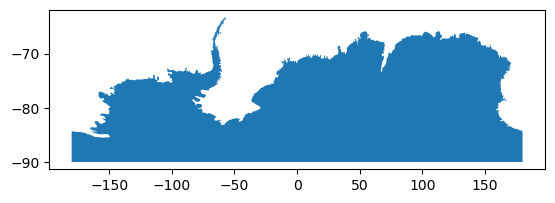

In [7]:
rgi_subreg.loc[rgi_subreg['RGI_CODE'] == '19-31'].plot();

In [8]:
aa_geom = rgi_subreg.loc[rgi_subreg['RGI_CODE'] == '19-31'].iloc[0].geometry

In [9]:
suba_geom = rgi_reg.iloc[-1].geometry.difference(aa_geom)

In [10]:
len(suba_geom.geoms)

2

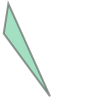

In [11]:
suba_geom.geoms[1]

In [12]:
suba_geom = suba_geom.geoms[0]
suba_geom.is_valid

True

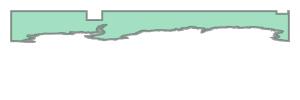

In [13]:
suba_geom

In [14]:
rgi_reg.loc[20, 'geometry'] = suba_geom

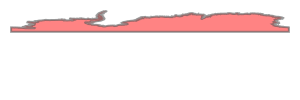

In [15]:
aa_geom

In [16]:
rgi_reg = pd.concat([rgi_reg, gpd.GeoDataFrame([aa_geom], columns=['geometry'], crs=rgi_reg.crs)], ignore_index=True)

In [17]:
rgi_reg

FULL_NAME  RGI_CODE WGMS_CODE  \
0                       Alaska       1.0       ALA   
1                       Alaska       1.0       ALA   
2       Western Canada and USA       2.0       WNA   
3         Arctic Canada, North       3.0       ACN   
4         Arctic Canada, South       4.0       ACS   
5          Greenland Periphery       5.0       GRL   
6                      Iceland       6.0       ISL   
7       Svalbard and Jan Mayen       7.0       SJM   
8                  Scandinavia       8.0       SCA   
9               Russian Arctic       9.0       RUA   
10                 Asia, North      10.0       ASN   
11                 Asia, North      10.0       ASN   
12              Central Europe      11.0       CEU   
13    Caucasus and Middle East      12.0       CAU   
14               Asia, Central      13.0       ASC   
15            Asia, South West      14.0       ASW   
16            Asia, South East      15.0       ASE   
17               Low Latitudes      16.0       TRP   
18              Southern Andes      17.0       SAN   
19                 New Zealand      18.0       NZL   
20  Antarctic and Subantarctic      19.0       ANT   
21                         NaN       NaN       NaN   

                                             geometry  
0   POLYGON ((-133.00000 54.50000, -134.00000 54.5...  
1   POLYGON ((180.00000 50.00000, 179.00000 50.000...  
2   POLYGON ((-133.00000 54.50000, -132.00000 54.5...  
3   POLYGON ((-125.00000 74.00000, -125.00000 75.0...  
4   POLYGON ((-90.00000 74.00000, -89.00000 74.000...  
5   POLYGON ((-75.00000 77.00000, -74.73000 77.510...  
6   POLYGON ((-26.00000 59.00000, -26.00000 60.000...  
7   POLYGON ((-10.00000 70.00000, -10.00000 71.000...  
8   POLYGON ((4.00000 70.00000, 4.00000 71.00000, ...  
9   POLYGON ((35.00000 70.00000, 35.00000 71.00000...  
10  POLYGON ((-180.00000 78.00000, -179.00000 78.0...  
11  POLYGON ((128.00000 46.00000, 127.00000 46.000...  
12  POLYGON ((-6.00000 40.00000, -6.00000 41.00000...  
13  POLYGON ((32.00000 31.00000, 32.00000 32.00000...  
14  POLYGON ((80.00000 46.00000, 81.00000 46.00000...  
15  POLYGON ((75.40000 26.00000, 75.00000 26.00000...  
16  POLYGON ((75.40000 26.00000, 75.40000 27.00000...  
17  POLYGON ((-100.00000 -25.00000, -100.00000 -24...  
18  POLYGON ((-62.00000 -45.50000, -62.00000 -46.0...  
19  POLYGON ((179.00000 -49.00000, 178.00000 -49.0...  
20  POLYGON ((-179.00000 -45.50000, -178.00000 -45...  
21  POLYGON ((131.80027 -66.21825, 131.89393 -66.2...

In [18]:
(~ rgi_reg.is_valid).sum()

2

In [19]:
rgi_reg.loc[~ rgi_reg.is_valid]

FULL_NAME  RGI_CODE WGMS_CODE  \
17  Low Latitudes      16.0       TRP   
21            NaN       NaN       NaN   

                                             geometry  
17  POLYGON ((-100.00000 -25.00000, -100.00000 -24...  
21  POLYGON ((131.80027 -66.21825, 131.89393 -66.2...

In [20]:
for i, s in rgi_reg.loc[~ rgi_reg.is_valid].iterrows():
    corr = make_valid(s.geometry)
    if type(corr) == shpg.Polygon:
        print(f'Success : {s.FULL_NAME}')
        rgi_reg.loc[i, 'geometry'] = corr
    else:
        for g in corr.geoms:
            print(type(g))

Success : Low Latitudes
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>


In [21]:
rgi_reg.loc[~ rgi_reg.is_valid]

FULL_NAME  RGI_CODE WGMS_CODE  \
21       NaN       NaN       NaN   

                                             geometry  
21  POLYGON ((131.80027 -66.21825, 131.89393 -66.2...

In [22]:
corr = make_valid(rgi_reg.loc[~ rgi_reg.is_valid].iloc[0].geometry)

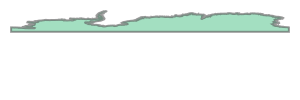

In [23]:
corr.geoms[0]

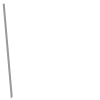

In [24]:
corr.geoms[1]

In [25]:
rgi_reg.loc[21, 'geometry'] = corr.geoms[0]
rgi_reg.loc[21, 'RGI_CODE'] = 20
rgi_reg['RGI_CODE'] = rgi_reg['RGI_CODE'].astype(int)
rgi_reg.loc[21, 'FULL_NAME'] = 'Antarctic Mainland'
rgi_reg.loc[20, 'FULL_NAME'] = 'Subantarctic and Antarctic Islands'

In [26]:
# Remove the useless Alaska box in the Eastern hemisphere
rgi_reg = rgi_reg.drop(1).reset_index()
del rgi_reg['index']

In [27]:
rgi_reg

FULL_NAME  RGI_CODE WGMS_CODE  \
0                               Alaska         1       ALA   
1               Western Canada and USA         2       WNA   
2                 Arctic Canada, North         3       ACN   
3                 Arctic Canada, South         4       ACS   
4                  Greenland Periphery         5       GRL   
5                              Iceland         6       ISL   
6               Svalbard and Jan Mayen         7       SJM   
7                          Scandinavia         8       SCA   
8                       Russian Arctic         9       RUA   
9                          Asia, North        10       ASN   
10                         Asia, North        10       ASN   
11                      Central Europe        11       CEU   
12            Caucasus and Middle East        12       CAU   
13                       Asia, Central        13       ASC   
14                    Asia, South West        14       ASW   
15                    Asia, South East        15       ASE   
16                       Low Latitudes        16       TRP   
17                      Southern Andes        17       SAN   
18                         New Zealand        18       NZL   
19  Subantarctic and Antarctic Islands        19       ANT   
20                  Antarctic Mainland        20       NaN   

                                             geometry  
0   POLYGON ((-133.00000 54.50000, -134.00000 54.5...  
1   POLYGON ((-133.00000 54.50000, -132.00000 54.5...  
2   POLYGON ((-125.00000 74.00000, -125.00000 75.0...  
3   POLYGON ((-90.00000 74.00000, -89.00000 74.000...  
4   POLYGON ((-75.00000 77.00000, -74.73000 77.510...  
5   POLYGON ((-26.00000 59.00000, -26.00000 60.000...  
6   POLYGON ((-10.00000 70.00000, -10.00000 71.000...  
7   POLYGON ((4.00000 70.00000, 4.00000 71.00000, ...  
8   POLYGON ((35.00000 70.00000, 35.00000 71.00000...  
9   POLYGON ((-180.00000 78.00000, -179.00000 78.0...  
10  POLYGON ((128.00000 46.00000, 127.00000 46.000...  
11  POLYGON ((-6.00000 40.00000, -6.00000 41.00000...  
12  POLYGON ((32.00000 31.00000, 32.00000 32.00000...  
13  POLYGON ((80.00000 46.00000, 81.00000 46.00000...  
14  POLYGON ((75.40000 26.00000, 75.00000 26.00000...  
15  POLYGON ((75.40000 26.00000, 75.40000 27.00000...  
16  POLYGON ((-100.00000 -24.00000, -100.00000 -23...  
17  POLYGON ((-62.00000 -45.50000, -62.00000 -46.0...  
18  POLYGON ((179.00000 -49.00000, 178.00000 -49.0...  
19  POLYGON ((-179.00000 -45.50000, -178.00000 -45...  
20  POLYGON ((131.99251 -66.18084, 132.10675 -66.1...

In [29]:
# Rename things that need renaming
rgi_reg['RGI_CODE'] = [f'{int(i):02d}' for i in rgi_reg['RGI_CODE']]

In [30]:
rgi_reg = rgi_reg.rename({'WGMS_CODE':'LONG_CODE'}, axis=1)
rgi_reg['FULL_NAME'] = [df_ref.loc[df_ref.RGI_CODE == i, 'FULL_NAME'].values[0] for i in rgi_reg['RGI_CODE']]
rgi_reg['LONG_CODE'] = [df_ref.loc[df_ref.RGI_CODE == i, 'LONG_CODE'].values[0] for i in rgi_reg['RGI_CODE']]

In [31]:
# Select the RGI 12 polygon
poly = rgi_reg.loc[rgi_reg.RGI_CODE == '12'].iloc[0].geometry
poly.bounds

(32.0, 31.0, 54.0, 45.0)

Let's go down to 30° South instead:

In [32]:
x, y = poly.exterior.xy
ny = np.where(np.isclose(y, 31), 30, y)
new_poly = shpg.Polygon(np.array((x, ny)).T)
rgi_reg.loc[rgi_reg.RGI_CODE == '12', 'geometry'] = new_poly

In [33]:
rgi_reg

FULL_NAME RGI_CODE  \
0                               Alaska       01   
1               Western Canada and USA       02   
2                  Arctic Canada North       03   
3                  Arctic Canada South       04   
4                  Greenland Periphery       05   
5                              Iceland       06   
6               Svalbard and Jan Mayen       07   
7                          Scandinavia       08   
8                       Russian Arctic       09   
9                           North Asia       10   
10                          North Asia       10   
11                      Central Europe       11   
12            Caucasus and Middle East       12   
13                        Central Asia       13   
14                     South Asia West       14   
15                     South Asia East       15   
16                       Low Latitudes       16   
17                      Southern Andes       17   
18                         New Zealand       18   
19  Subantarctic and Antarctic Islands       19   
20                  Antarctic Mainland       20   

                            LONG_CODE  \
0                           01_alaska   
1               02_western_canada_usa   
2              03_arctic_canada_north   
3              04_arctic_canada_south   
4              05_greenland_periphery   
5                          06_iceland   
6               07_svalbard_jan_mayen   
7                      08_scandinavia   
8                   09_russian_arctic   
9                       10_north_asia   
10                      10_north_asia   
11                  11_central_europe   
12            12_caucasus_middle_east   
13                    13_central_asia   
14                 14_south_asia_west   
15                 15_south_asia_east   
16                   16_low_latitudes   
17                  17_southern_andes   
18                     18_new_zealand   
19  19_subantarctic_antarctic_islands   
20              20_antarctic_mainland   

                                             geometry  
0   POLYGON ((-133.00000 54.50000, -134.00000 54.5...  
1   POLYGON ((-133.00000 54.50000, -132.00000 54.5...  
2   POLYGON ((-125.00000 74.00000, -125.00000 75.0...  
3   POLYGON ((-90.00000 74.00000, -89.00000 74.000...  
4   POLYGON ((-75.00000 77.00000, -74.73000 77.510...  
5   POLYGON ((-26.00000 59.00000, -26.00000 60.000...  
6   POLYGON ((-10.00000 70.00000, -10.00000 71.000...  
7   POLYGON ((4.00000 70.00000, 4.00000 71.00000, ...  
8   POLYGON ((35.00000 70.00000, 35.00000 71.00000...  
9   POLYGON ((-180.00000 78.00000, -179.00000 78.0...  
10  POLYGON ((128.00000 46.00000, 127.00000 46.000...  
11  POLYGON ((-6.00000 40.00000, -6.00000 41.00000...  
12  POLYGON ((32.00000 30.00000, 32.00000 32.00000...  
13  POLYGON ((80.00000 46.00000, 81.00000 46.00000...  
14  POLYGON ((75.40000 26.00000, 75.00000 26.00000...  
15  POLYGON ((75.40000 26.00000, 75.40000 27.00000...  
16  POLYGON ((-100.00000 -24.00000, -100.00000 -23...  
17  POLYGON ((-62.00000 -45.50000, -62.00000 -46.0...  
18  POLYGON ((179.00000 -49.00000, 178.00000 -49.0...  
19  POLYGON ((-179.00000 -45.50000, -178.00000 -45...  
20  POLYGON ((131.99251 -66.18084, 132.10675 -66.1...

In [34]:
(~ rgi_reg.is_valid).sum()

0

In [35]:
# Remove RGI 20
# rgi_reg = rgi_reg.iloc[:-1]

In [36]:
# Remame columns
names = [s.lower() for s in rgi_reg.columns]
names[1] = 'o1region'
rgi_reg.columns = names
rgi_reg = rgi_reg[['o1region', 'full_name', 'long_code', 'geometry']]
rgi_reg

o1region                           full_name  \
0        01                              Alaska   
1        02              Western Canada and USA   
2        03                 Arctic Canada North   
3        04                 Arctic Canada South   
4        05                 Greenland Periphery   
5        06                             Iceland   
6        07              Svalbard and Jan Mayen   
7        08                         Scandinavia   
8        09                      Russian Arctic   
9        10                          North Asia   
10       10                          North Asia   
11       11                      Central Europe   
12       12            Caucasus and Middle East   
13       13                        Central Asia   
14       14                     South Asia West   
15       15                     South Asia East   
16       16                       Low Latitudes   
17       17                      Southern Andes   
18       18                         New Zealand   
19       19  Subantarctic and Antarctic Islands   
20       20                  Antarctic Mainland   

                            long_code  \
0                           01_alaska   
1               02_western_canada_usa   
2              03_arctic_canada_north   
3              04_arctic_canada_south   
4              05_greenland_periphery   
5                          06_iceland   
6               07_svalbard_jan_mayen   
7                      08_scandinavia   
8                   09_russian_arctic   
9                       10_north_asia   
10                      10_north_asia   
11                  11_central_europe   
12            12_caucasus_middle_east   
13                    13_central_asia   
14                 14_south_asia_west   
15                 15_south_asia_east   
16                   16_low_latitudes   
17                  17_southern_andes   
18                     18_new_zealand   
19  19_subantarctic_antarctic_islands   
20              20_antarctic_mainland   

                                             geometry  
0   POLYGON ((-133.00000 54.50000, -134.00000 54.5...  
1   POLYGON ((-133.00000 54.50000, -132.00000 54.5...  
2   POLYGON ((-125.00000 74.00000, -125.00000 75.0...  
3   POLYGON ((-90.00000 74.00000, -89.00000 74.000...  
4   POLYGON ((-75.00000 77.00000, -74.73000 77.510...  
5   POLYGON ((-26.00000 59.00000, -26.00000 60.000...  
6   POLYGON ((-10.00000 70.00000, -10.00000 71.000...  
7   POLYGON ((4.00000 70.00000, 4.00000 71.00000, ...  
8   POLYGON ((35.00000 70.00000, 35.00000 71.00000...  
9   POLYGON ((-180.00000 78.00000, -179.00000 78.0...  
10  POLYGON ((128.00000 46.00000, 127.00000 46.000...  
11  POLYGON ((-6.00000 40.00000, -6.00000 41.00000...  
12  POLYGON ((32.00000 30.00000, 32.00000 32.00000...  
13  POLYGON ((80.00000 46.00000, 81.00000 46.00000...  
14  POLYGON ((75.40000 26.00000, 75.00000 26.00000...  
15  POLYGON ((75.40000 26.00000, 75.40000 27.00000...  
16  POLYGON ((-100.00000 -24.00000, -100.00000 -23...  
17  POLYGON ((-62.00000 -45.50000, -62.00000 -46.0...  
18  POLYGON ((179.00000 -49.00000, 178.00000 -49.0...  
19  POLYGON ((-179.00000 -45.50000, -178.00000 -45...  
20  POLYGON ((131.99251 -66.18084, 132.10675 -66.1...

In [37]:
print(rgi_reg.set_index('o1region')[['full_name', 'long_code']].to_markdown())

|   o1region | full_name                          | long_code                         |
|-----------:|:-----------------------------------|:----------------------------------|
|         01 | Alaska                             | 01_alaska                         |
|         02 | Western Canada and USA             | 02_western_canada_usa             |
|         03 | Arctic Canada North                | 03_arctic_canada_north            |
|         04 | Arctic Canada South                | 04_arctic_canada_south            |
|         05 | Greenland Periphery                | 05_greenland_periphery            |
|         06 | Iceland                            | 06_iceland                        |
|         07 | Svalbard and Jan Mayen             | 07_svalbard_jan_mayen             |
|         08 | Scandinavia                        | 08_scandinavia                    |
|         09 | Russian Arctic                     | 09_russian_arctic                 |
|         10 | North Asia       

In [38]:
rgi_reg.crs = 'EPSG:4326'

In [39]:
out_file_dir = os.path.join(out_dir, '00_rgi70_O1Regions')
rgi_reg.to_file(out_file_dir)

In [40]:
shutil.make_archive(f'{out_dir}/00_rgi70_O1Regions', 'zip', out_file_dir)

'/home/www/fmaussion/misc/rgi7_data/00_rgi70_regions/00_rgi70_O1Regions.zip'

In [41]:
# Check
rgi_reg = gpd.read_file(out_file_dir)
assert rgi_reg.o1region.dtype == 'O'

In [42]:
gpd.io.file.infer_schema(rgi_reg)

{'geometry': 'Polygon',
 'properties': OrderedDict([('o1region', 'str'),
              ('full_name', 'str'),
              ('long_code', 'str')])}

## Subregions 

In [43]:
rgi_reg = gpd.read_file('zip://' + os.path.join(data_dir, 'l0_RGIv6', '00_rgi60_regions.zip', '00_rgi60_O2Regions.shp'))

In [44]:
# Read the new names
df_ref = pd.read_csv(os.path.join(out_dir, '00_rgi70_rgi_subregion_names.csv'), dtype=str)
df_ref

FULL_NAME RGI_CODE LONG_CODE
0                         North Alaska    01-01       NaN
1      Alaska Range (Wrangell/Kilbuck)    01-02       NaN
2         Alaska Peninsula (Aleutians)    01-03       NaN
3         Alaska Peninsula (Aleutians)    01-03       NaN
4   West Chugach Mountains (Talkeetna)    01-04       NaN
..                                 ...      ...       ...
88   Northeast Antarctic Peninsula 7I2    19-21       NaN
89   Southeast Antarctic Peninsula 7I3    19-22       NaN
90         Ronne-Filchner Ice Shelf 7J    19-23       NaN
91             West Queen Maud Land 7K    19-24       NaN
92                  Antarctic Mainland    20-01       NaN

[93 rows x 3 columns]

In [45]:
len(rgi_reg.RGI_CODE.unique())

91

In [46]:
# Create a long code
long = []
for s in df_ref['FULL_NAME']:
    s = s.replace('(', '').replace(')', '').replace('/', '_').replace('-', '_')
    s = '_'.join([so.lower() for so in s.split(' ')])
    long.append(s.replace('__', '_').replace('__', '_'))
df_ref['LONG_CODE'] = long

In [47]:
# Move RGI12 a bit south
poly = rgi_reg.loc[rgi_reg.RGI_CODE == '12-02'].iloc[0].geometry
poly.bounds

(34.0, 32.0, 53.0, 42.0)

In [48]:
x, y = poly.exterior.xy
ny = np.where(np.isclose(y, 32), 30, y)
new_poly = shpg.Polygon(np.array((x, ny)).T)
rgi_reg.loc[rgi_reg.RGI_CODE == '12-02', 'geometry'] = new_poly

In [49]:
# Remove the useless Alaska box in the Eastern hemisphere
rgi_reg = rgi_reg.drop(3).reset_index()
del rgi_reg['index']

In [50]:
# Rename things that need renaming
rgi_reg.loc[91, 'RGI_CODE'] = '20-01'
rgi_reg.loc[91, 'FULL_NAME'] = 'Antarctic Mainland'
rgi_reg = rgi_reg.rename({'WGMS_CODE':'LONG_CODE'}, axis=1)
rgi_reg['FULL_NAME'] = [df_ref.loc[df_ref.RGI_CODE == i, 'FULL_NAME'].values[0] for i in rgi_reg['RGI_CODE']]
rgi_reg['LONG_CODE'] = [i + '_' + df_ref.loc[df_ref.RGI_CODE == i, 'LONG_CODE'].values[0] for i in rgi_reg['RGI_CODE']]

In [51]:
(~ rgi_reg.is_valid).sum()

3

In [52]:
for i, s in rgi_reg.loc[~ rgi_reg.is_valid].iterrows():
    corr = make_valid(s.geometry)
    if type(corr) == shpg.Polygon:
        print(f'Success : {s.FULL_NAME}')
        rgi_reg.loc[i, 'geometry'] = corr
    else:
        print(f'Not good : {s.FULL_NAME}')
        for g in corr.geoms:
            print(type(g))

Success : North Coast Ranges
Success : Marie Byrd Land 7F
Not good : Antarctic Mainland
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>


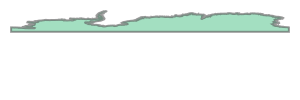

In [53]:
corr.geoms[0]

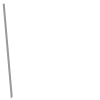

In [54]:
corr.geoms[1]

In [55]:
rgi_reg.loc[i, 'geometry'] = corr.geoms[0]

In [56]:
(~ rgi_reg.is_valid).sum()

0

In [57]:
rgi_reg

FULL_NAME RGI_CODE  \
0                         North Alaska    01-01   
1      Alaska Range (Wrangell/Kilbuck)    01-02   
2         Alaska Peninsula (Aleutians)    01-03   
3   West Chugach Mountains (Talkeetna)    01-04   
4                Saint Elias Mountains    01-05   
..                                 ...      ...   
87   Northeast Antarctic Peninsula 7I2    19-21   
88   Southeast Antarctic Peninsula 7I3    19-22   
89         Ronne-Filchner Ice Shelf 7J    19-23   
90             West Queen Maud Land 7K    19-24   
91                  Antarctic Mainland    20-01   

                                  LONG_CODE  \
0                        01-01_north_alaska   
1       01-02_alaska_range_wrangell_kilbuck   
2          01-03_alaska_peninsula_aleutians   
3    01-04_west_chugach_mountains_talkeetna   
4               01-05_saint_elias_mountains   
..                                      ...   
87  19-21_northeast_antarctic_peninsula_7i2   
88  19-22_southeast_antarctic_peninsula_7i3   
89        19-23_ronne_filchner_ice_shelf_7j   
90            19-24_west_queen_maud_land_7k   
91                 20-01_antarctic_mainland   

                                             geometry  
0   POLYGON ((-169.00000 64.00000, -169.00000 65.0...  
1   POLYGON ((-144.40436 61.48531, -144.48100 61.5...  
2   POLYGON ((-180.00000 57.00000, -179.00000 57.0...  
3   POLYGON ((-151.32973 58.74602, -151.57953 58.8...  
4   POLYGON ((-144.25108 61.44018, -144.07510 61.3...  
..                                                ...  
87  POLYGON ((-62.41123 -69.50624, -62.41913 -69.5...  
88  POLYGON ((-50.00000 -74.80000, -51.00000 -74.8...  
89  POLYGON ((-42.00000 -74.80000, -41.00000 -74.8...  
90  POLYGON ((-10.30000 -69.40000, -10.00000 -69.4...  
91  POLYGON ((131.99251 -66.18084, 132.10675 -66.1...  

[92 rows x 4 columns]

In [58]:
# Remove RGI 20
# rgi_reg = rgi_reg.iloc[:-1]

In [59]:
# Remove Greenland icesheet
rgi_reg = rgi_reg.loc[rgi_reg.RGI_CODE != '05-11'].copy()

In [60]:
# Add o1region for help
rgi_reg['o1Region'] = [s.split('-')[0] for s in rgi_reg.RGI_CODE]

In [61]:
# order 
rgi_reg = rgi_reg[['o1Region', 'RGI_CODE', 'FULL_NAME', 'LONG_CODE', 'geometry']]

In [62]:
# Remame things
names = [s.lower() for s in rgi_reg.columns]
names[1] = 'o2region'
rgi_reg.columns = names
rgi_reg

o1region o2region                           full_name  \
0        01    01-01                        North Alaska   
1        01    01-02     Alaska Range (Wrangell/Kilbuck)   
2        01    01-03        Alaska Peninsula (Aleutians)   
3        01    01-04  West Chugach Mountains (Talkeetna)   
4        01    01-05               Saint Elias Mountains   
..      ...      ...                                 ...   
87       19    19-21   Northeast Antarctic Peninsula 7I2   
88       19    19-22   Southeast Antarctic Peninsula 7I3   
89       19    19-23         Ronne-Filchner Ice Shelf 7J   
90       19    19-24             West Queen Maud Land 7K   
91       20    20-01                  Antarctic Mainland   

                                  long_code  \
0                        01-01_north_alaska   
1       01-02_alaska_range_wrangell_kilbuck   
2          01-03_alaska_peninsula_aleutians   
3    01-04_west_chugach_mountains_talkeetna   
4               01-05_saint_elias_mountains   
..                                      ...   
87  19-21_northeast_antarctic_peninsula_7i2   
88  19-22_southeast_antarctic_peninsula_7i3   
89        19-23_ronne_filchner_ice_shelf_7j   
90            19-24_west_queen_maud_land_7k   
91                 20-01_antarctic_mainland   

                                             geometry  
0   POLYGON ((-169.00000 64.00000, -169.00000 65.0...  
1   POLYGON ((-144.40436 61.48531, -144.48100 61.5...  
2   POLYGON ((-180.00000 57.00000, -179.00000 57.0...  
3   POLYGON ((-151.32973 58.74602, -151.57953 58.8...  
4   POLYGON ((-144.25108 61.44018, -144.07510 61.3...  
..                                                ...  
87  POLYGON ((-62.41123 -69.50624, -62.41913 -69.5...  
88  POLYGON ((-50.00000 -74.80000, -51.00000 -74.8...  
89  POLYGON ((-42.00000 -74.80000, -41.00000 -74.8...  
90  POLYGON ((-10.30000 -69.40000, -10.00000 -69.4...  
91  POLYGON ((131.99251 -66.18084, 132.10675 -66.1...  

[91 rows x 5 columns]

In [63]:
len(rgi_reg.o2region.unique())

90

In [64]:
rgi_reg.crs = 'EPSG:4326'

In [65]:
out_file_dir = os.path.join(out_dir, '00_rgi70_O2Regions')
rgi_reg.to_file(out_file_dir)

In [66]:
shutil.make_archive(f'{out_dir}/00_rgi70_O2Regions', 'zip', out_file_dir)

'/home/www/fmaussion/misc/rgi7_data/00_rgi70_regions/00_rgi70_O2Regions.zip'

In [67]:
print(rgi_reg.set_index('o2region')[['full_name', 'long_code']].to_markdown())

| o2region   | full_name                                | long_code                                    |
|:-----------|:-----------------------------------------|:---------------------------------------------|
| 01-01      | North Alaska                             | 01-01_north_alaska                           |
| 01-02      | Alaska Range (Wrangell/Kilbuck)          | 01-02_alaska_range_wrangell_kilbuck          |
| 01-03      | Alaska Peninsula (Aleutians)             | 01-03_alaska_peninsula_aleutians             |
| 01-04      | West Chugach Mountains (Talkeetna)       | 01-04_west_chugach_mountains_talkeetna       |
| 01-05      | Saint Elias Mountains                    | 01-05_saint_elias_mountains                  |
| 01-06      | North Coast Ranges                       | 01-06_north_coast_ranges                     |
| 02-01      | Mackenzie and Selwyn Mountains           | 02-01_mackenzie_and_selwyn_mountains         |
| 02-02      | South Coast Ranges                      